# PROBLEM INFORMATION

Project name :   Employee Attrition Prediction and Monthly rate Prediction
        Project objective: The aim of this project is to predict employee attrition for a company using machine learning algorithms. The dataset contains various features such as employee satisfaction level, work accident, promotion, salary, and other factors that can impact employee retention. The predictive model is built using Python's Scikit-Learn library. The dataset is split into training and testing sets, and several machine learning algorithms are tested, including Logistic Regression, Decision Trees, Random Forest, etc.using different pruning techniques like -> Min samples leaf , min sample split, max depth and impurity indices  such as Gini Index , Entropy , and adaboost classifier The performance of the models is evaluated using accuracy,
2.we also made a model to predict the monthly rate of pay for the employee using these same techniques but the difference is this is a regression model, and The performance of the models is evaluated using mean absolute error.

# Problem Statement

*Perform Regression treating Monthly Rate as Y, and choose prediction error and the best model

# Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Read DataSet

In [5]:
df = pd.read_csv(r"C:\Users\Aishwarya\Downloads\HR-Employee-Attrition-Table 1.csv")

In [7]:
pd.set_option("display.max_columns",50)

# Profile

In [9]:
df.head(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Dropping discrete variables as they do not contain any statistical info
df = df.drop(labels=["StandardHours","Over18","EmployeeCount"],axis=1)

# Cat Con

In [11]:
cat = []
con = []

for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
df[con].nunique().sort_values()

Attrition                      2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
RelationshipSatisfaction       4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64

In [13]:
 # some values in con are categorical , so removing them from con and adding in cat
Q = list(df[con].nunique().sort_values().index[0:11])

In [14]:
Q

['Attrition',
 'PerformanceRating',
 'WorkLifeBalance',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'Education',
 'JobLevel',
 'TrainingTimesLastYear']

In [15]:
for i in Q:
    con.remove(i)
    cat.append(i)

In [16]:
cat , df[cat].shape

(['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'OverTime',
  'Attrition',
  'PerformanceRating',
  'WorkLifeBalance',
  'StockOptionLevel',
  'RelationshipSatisfaction',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobSatisfaction',
  'Education',
  'JobLevel',
  'TrainingTimesLastYear'],
 (1470, 18))

In [17]:
con , df[con].shape

(['Age',
  'DailyRate',
  'DistanceFromHome',
  'EmployeeNumber',
  'HourlyRate',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'TotalWorkingYears',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 (1470, 14))

# Missing Data

In [18]:
df.isna().sum() 

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Outliers

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
conss = pd.DataFrame(ss.fit_transform(df[con]),columns=con)

In [20]:
outliers = []

for i in conss.columns:
    outliers.extend(list(conss[(conss[i]>3) |( conss[i]<-3)].index))
    
from numpy import unique
outliers = unique(outliers)
outliers

array([  28,   45,   62,   63,   64,   85,   98,  110,  123,  126,  153,
        178,  187,  190,  218,  231,  237,  270,  281,  326,  386,  401,
        411,  425,  427,  445,  466,  473,  477,  535,  561,  584,  592,
        595,  616,  624,  635,  653,  677,  686,  701,  716,  746,  749,
        752,  799,  838,  861,  875,  894,  914,  918,  922,  926,  937,
        956,  962,  976, 1008, 1024, 1043, 1078, 1086, 1093, 1111, 1116,
       1135, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301, 1303, 1327,
       1331, 1348, 1351, 1401, 1414, 1430])

In [21]:
# reindexing
df = df.drop(index= outliers, axis=1)

In [23]:
df.shape[0]

1387

In [24]:
df.index = range(0 ,df.shape[0],1 )
#df

# EDA

cat vs con ---> ANOVA

cat vs cat ---> Chi-sq

In [29]:
# ANOVA

def ANOVA(df , cat , con):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    rel = con + "~" + cat
    model = ols(rel,df).fit()
    Q = anova_lm(model)
    pval = round(Q.iloc[0:1,4][0],4)
    return pval

In [30]:
imp_con_cols = []
for i in con:
    p = ANOVA(df ,"Attrition",i)
    print("Attrition vs ",i,"\n pval ----------------------------------> ",p)
    if (p <= 0.05):
        imp_con_cols.append(i)

Attrition vs  Age 
 pval ---------------------------------->  0.0
Attrition vs  DailyRate 
 pval ---------------------------------->  0.0331
Attrition vs  DistanceFromHome 
 pval ---------------------------------->  0.0023
Attrition vs  EmployeeNumber 
 pval ---------------------------------->  0.7051
Attrition vs  HourlyRate 
 pval ---------------------------------->  0.9545
Attrition vs  MonthlyIncome 
 pval ---------------------------------->  0.0
Attrition vs  MonthlyRate 
 pval ---------------------------------->  0.5796
Attrition vs  NumCompaniesWorked 
 pval ---------------------------------->  0.061
Attrition vs  PercentSalaryHike 
 pval ---------------------------------->  0.8156
Attrition vs  TotalWorkingYears 
 pval ---------------------------------->  0.0
Attrition vs  YearsAtCompany 
 pval ---------------------------------->  0.0
Attrition vs  YearsInCurrentRole 
 pval ---------------------------------->  0.0
Attrition vs  YearsSinceLastPromotion 
 pval -------------------

In [31]:
imp_con_cols , df[imp_con_cols].shape

(['Age',
  'DailyRate',
  'DistanceFromHome',
  'MonthlyIncome',
  'TotalWorkingYears',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsWithCurrManager'],
 (1387, 8))

In [32]:
# Chisquare

def chisquare(df , cat1 , cat2):
    from scipy.stats import chi2_contingency
    chisq , pval , dof , contab = chi2_contingency(pd.crosstab(df[cat1],df[cat2]))
    return pval

imp_cat_cols = []
for i in cat:
    print("Attrition vs ", i, "\n pval ------------------------------->",round(chisquare(df , "Attrition",i),2) )
    
    if(round(chisquare(df , "Attrition",i),2) <0.05):
        imp_cat_cols.append(i)

Attrition vs  BusinessTravel 
 pval -------------------------------> 0.0
Attrition vs  Department 
 pval -------------------------------> 0.0
Attrition vs  EducationField 
 pval -------------------------------> 0.01
Attrition vs  Gender 
 pval -------------------------------> 0.2
Attrition vs  JobRole 
 pval -------------------------------> 0.0
Attrition vs  MaritalStatus 
 pval -------------------------------> 0.0
Attrition vs  OverTime 
 pval -------------------------------> 0.0
Attrition vs  Attrition 
 pval -------------------------------> 0.0
Attrition vs  PerformanceRating 
 pval -------------------------------> 0.76
Attrition vs  WorkLifeBalance 
 pval -------------------------------> 0.0
Attrition vs  StockOptionLevel 
 pval -------------------------------> 0.0
Attrition vs  RelationshipSatisfaction 
 pval -------------------------------> 0.1
Attrition vs  EnvironmentSatisfaction 
 pval -------------------------------> 0.0
Attrition vs  JobInvolvement 
 pval -------------------

In [33]:
imp_cat_cols , df[imp_cat_cols].shape

(['BusinessTravel',
  'Department',
  'EducationField',
  'JobRole',
  'MaritalStatus',
  'OverTime',
  'Attrition',
  'WorkLifeBalance',
  'StockOptionLevel',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobSatisfaction',
  'JobLevel',
  'TrainingTimesLastYear'],
 (1387, 14))

In [34]:
imp_cat_cols.remove('Attrition')

# Data Visualization

# Attrition

0    1158
1     229
Name: Attrition, dtype: int64

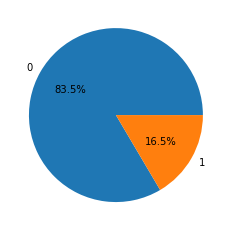

In [35]:
Y = df["Attrition"].value_counts()
plt.pie(Y.values, labels=Y.index , autopct= '%1.1f%%')
Y

# Univariate Analysis

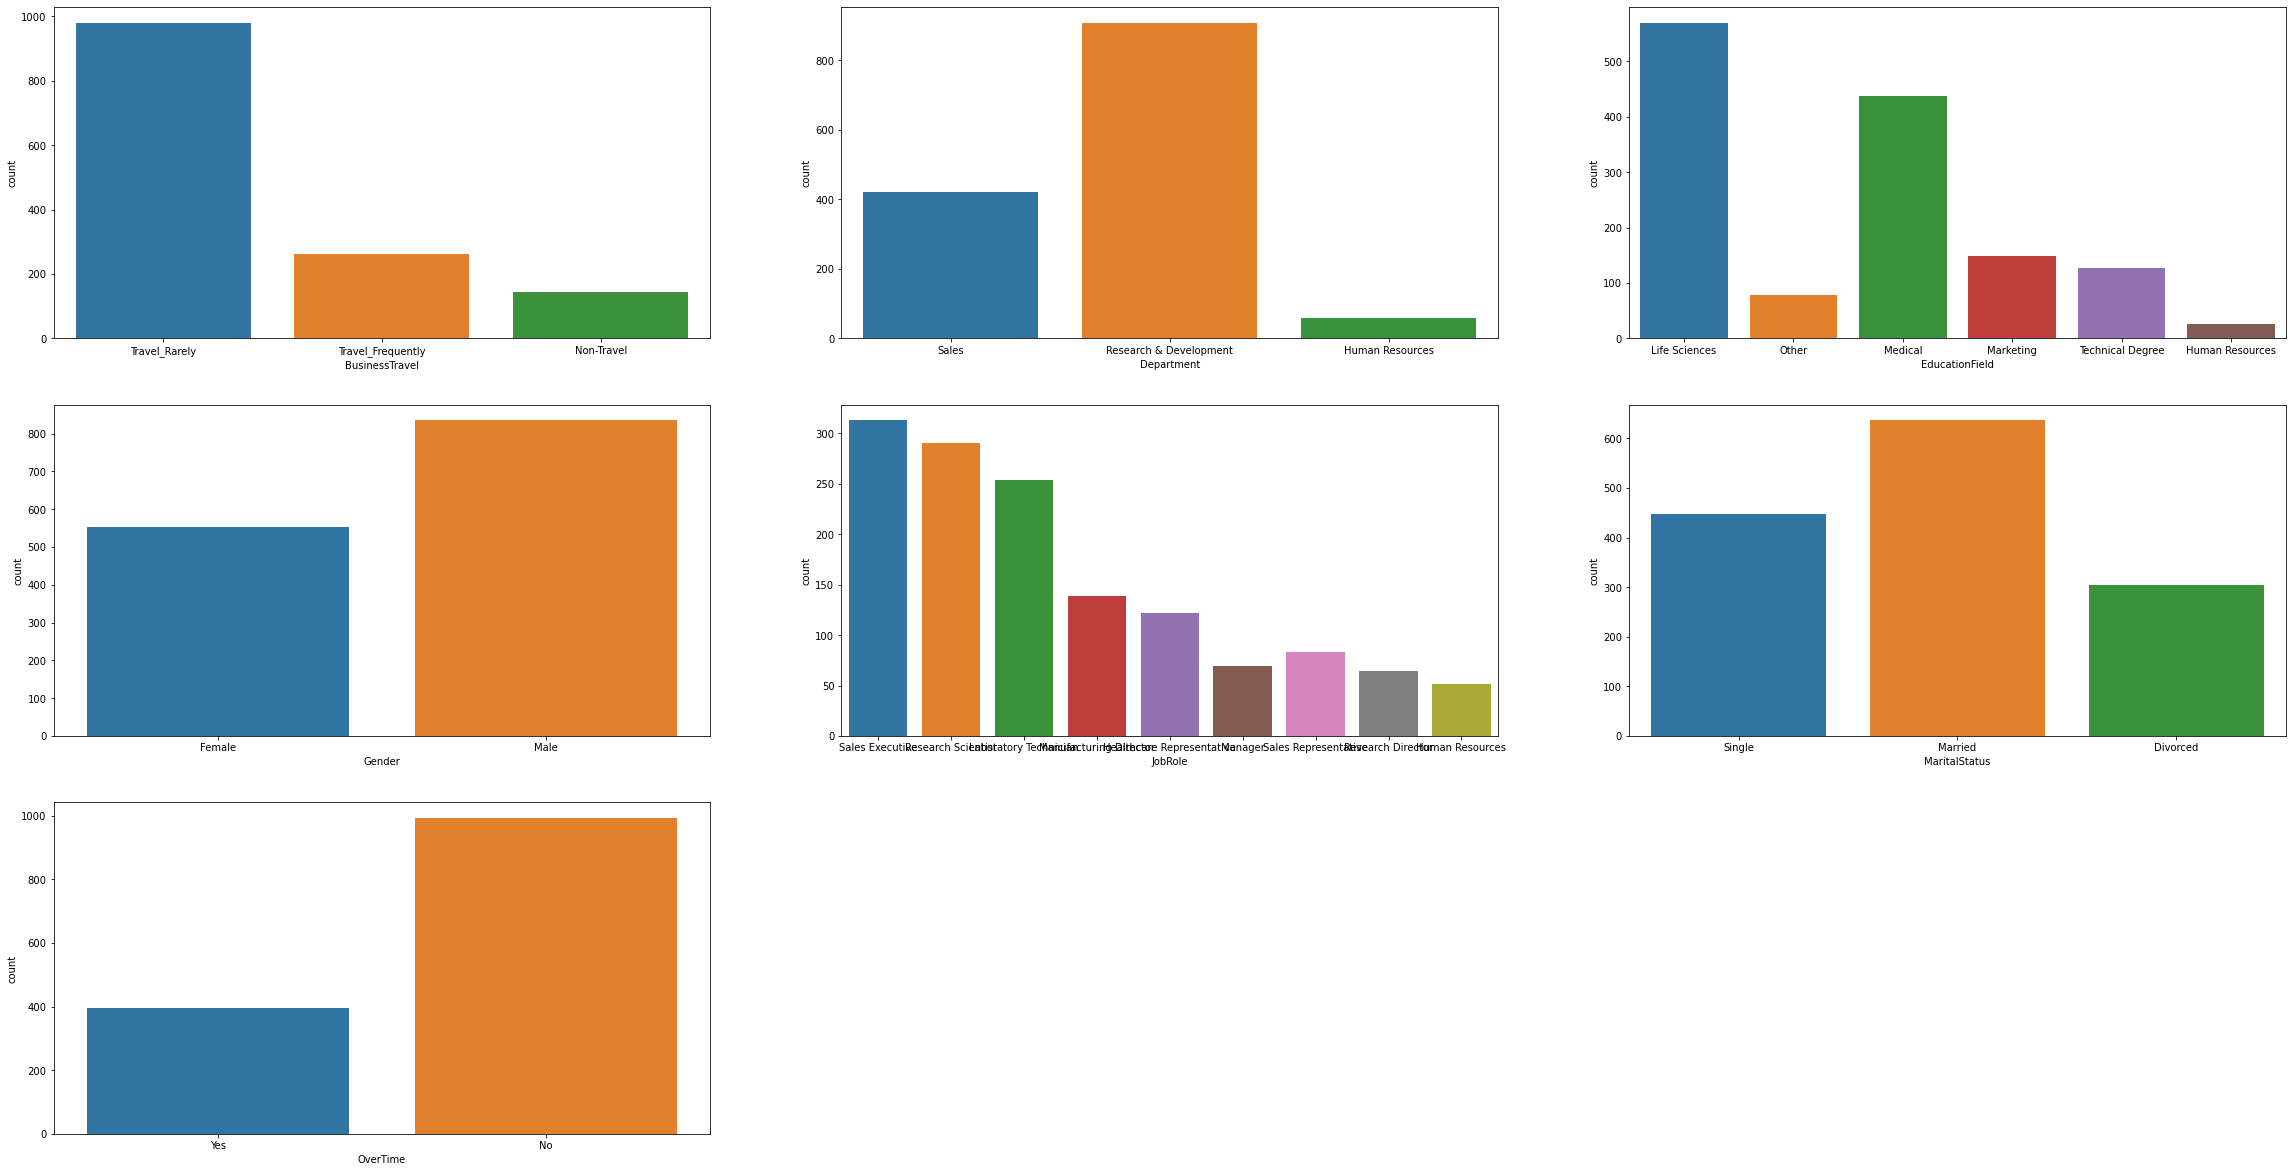

In [36]:
plt.figure(figsize=(40,50))

x = 1
for i in df.columns:
    if(df[i].dtypes == "object"):
        plt.subplot(7,3,x)
        sns.countplot(df[i])
        x = x+1

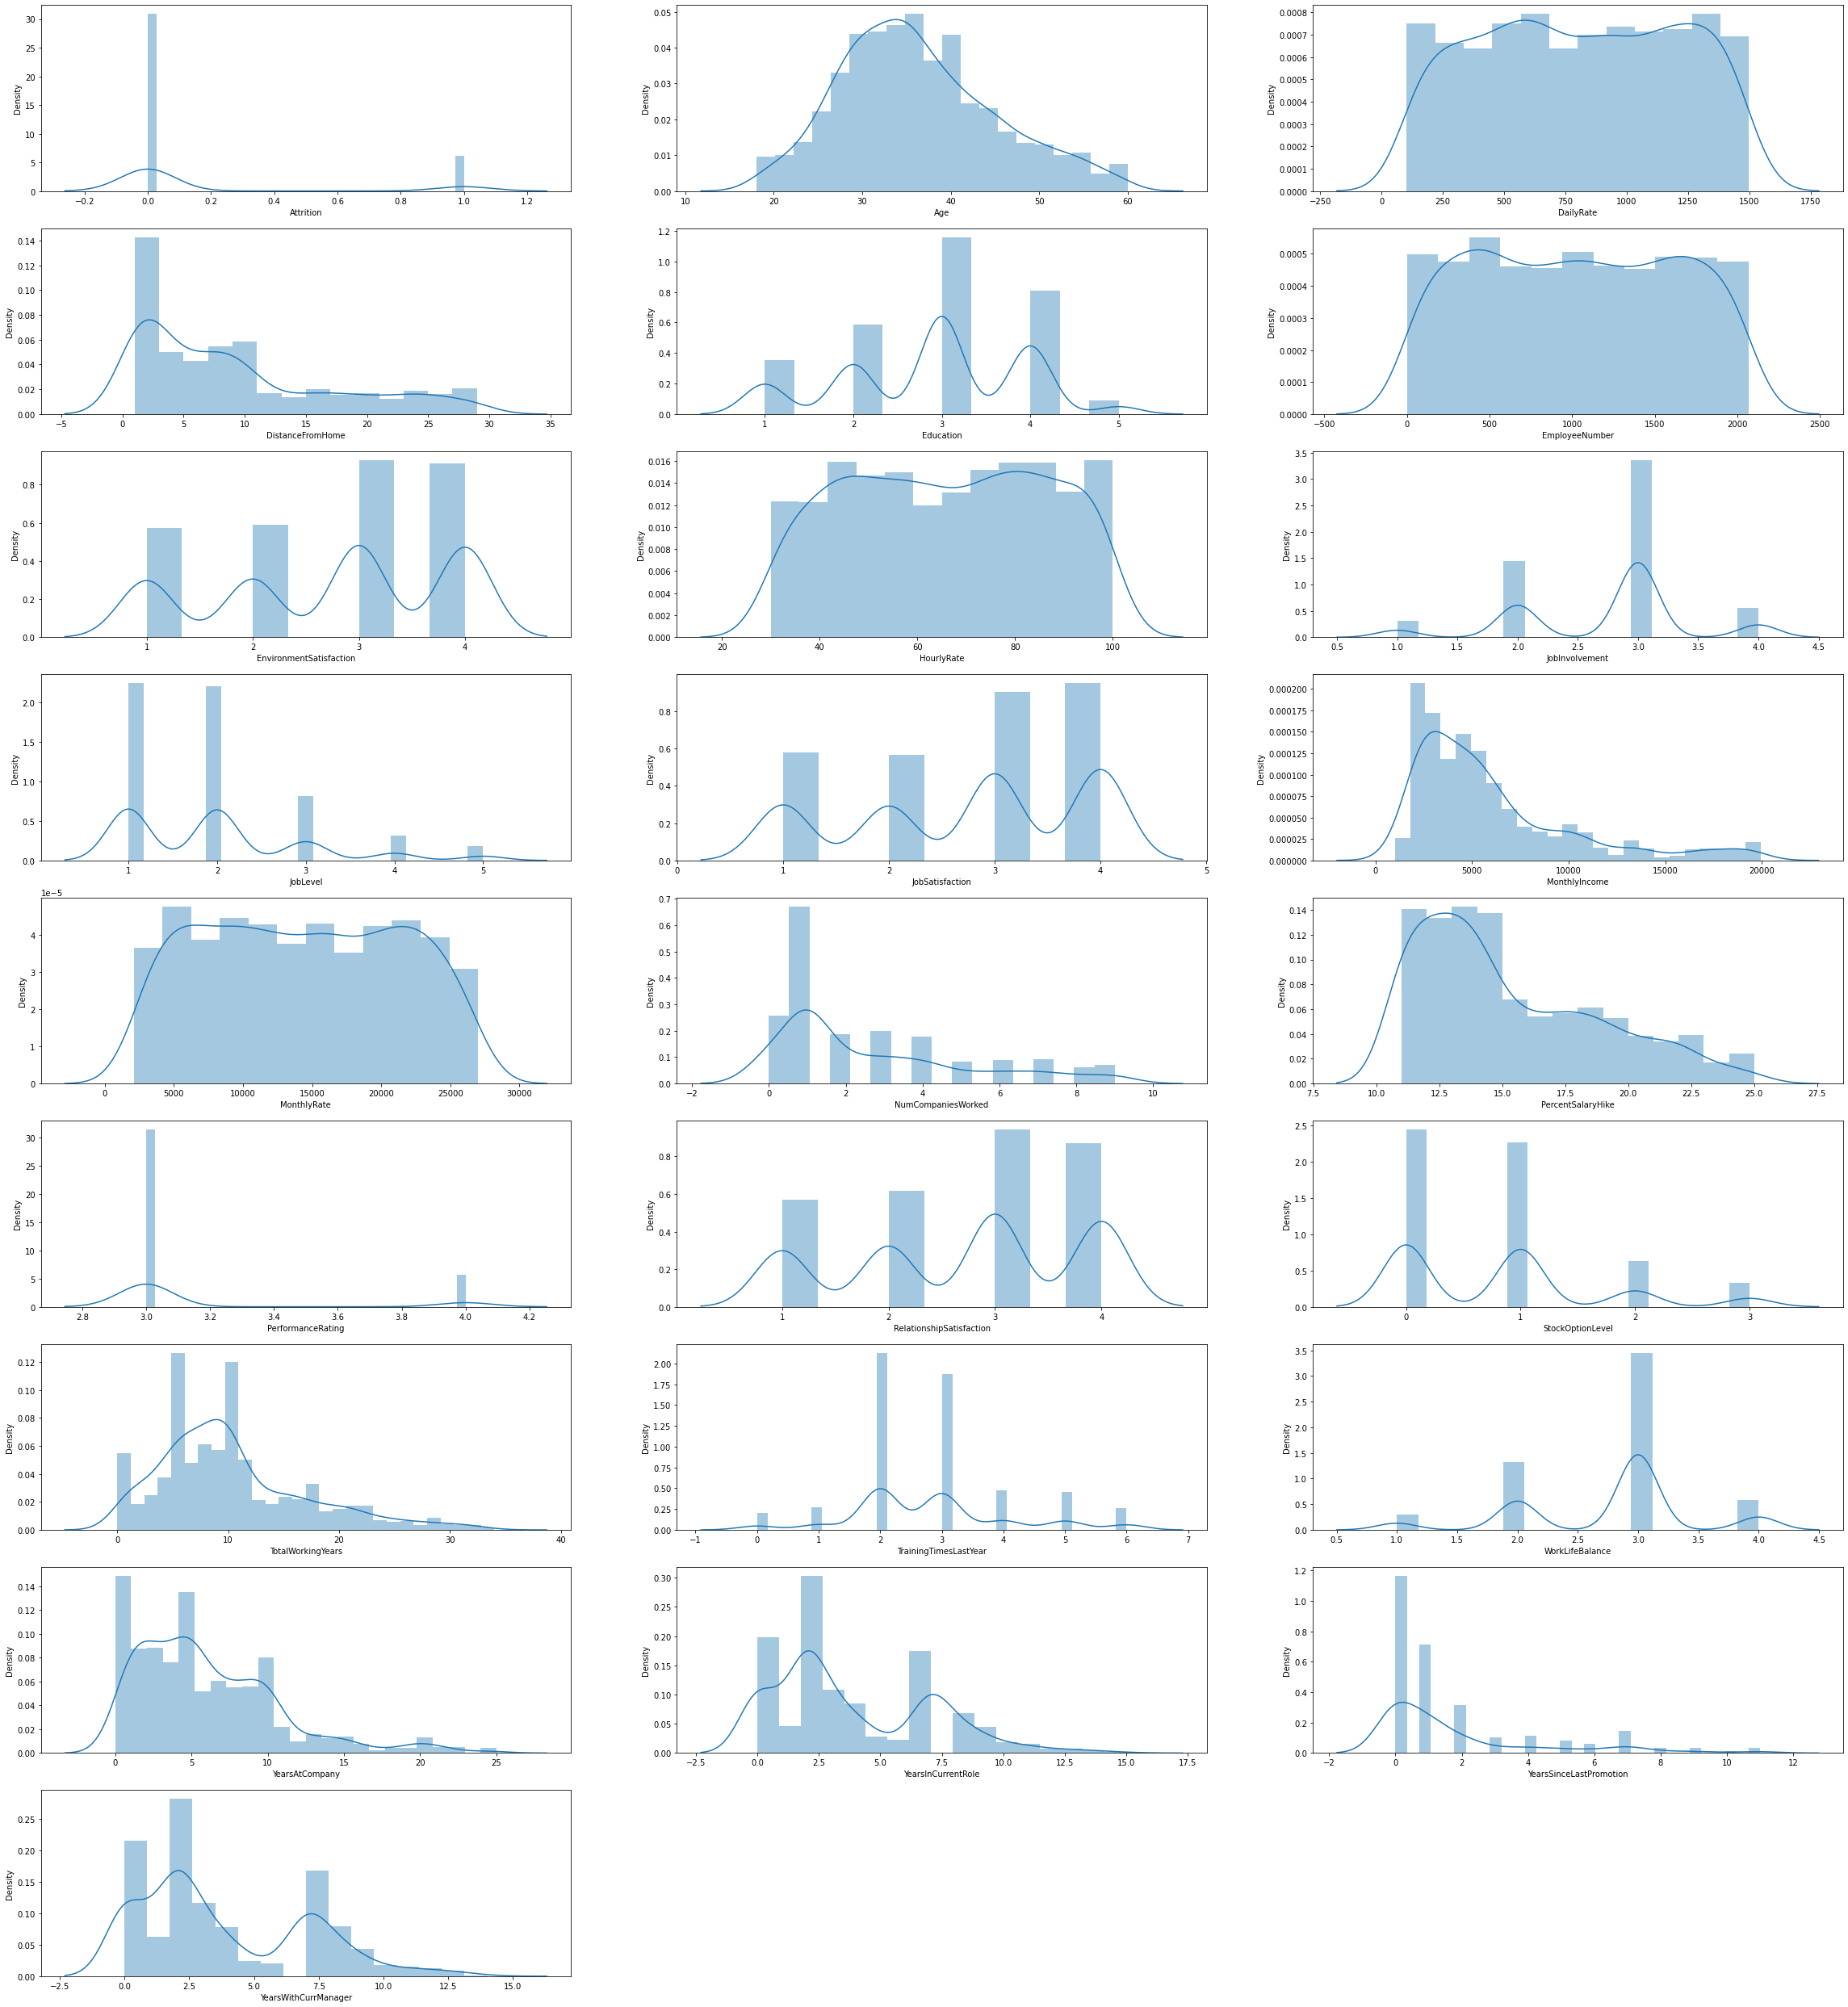

In [37]:
plt.figure(figsize=(40,50))

x = 1
for i in df.columns:
    if(df[i].dtypes == "int64"):
        plt.subplot(10,3,x)
        sns.distplot(df[i])
        x = x+1

# Bivariate Analysis

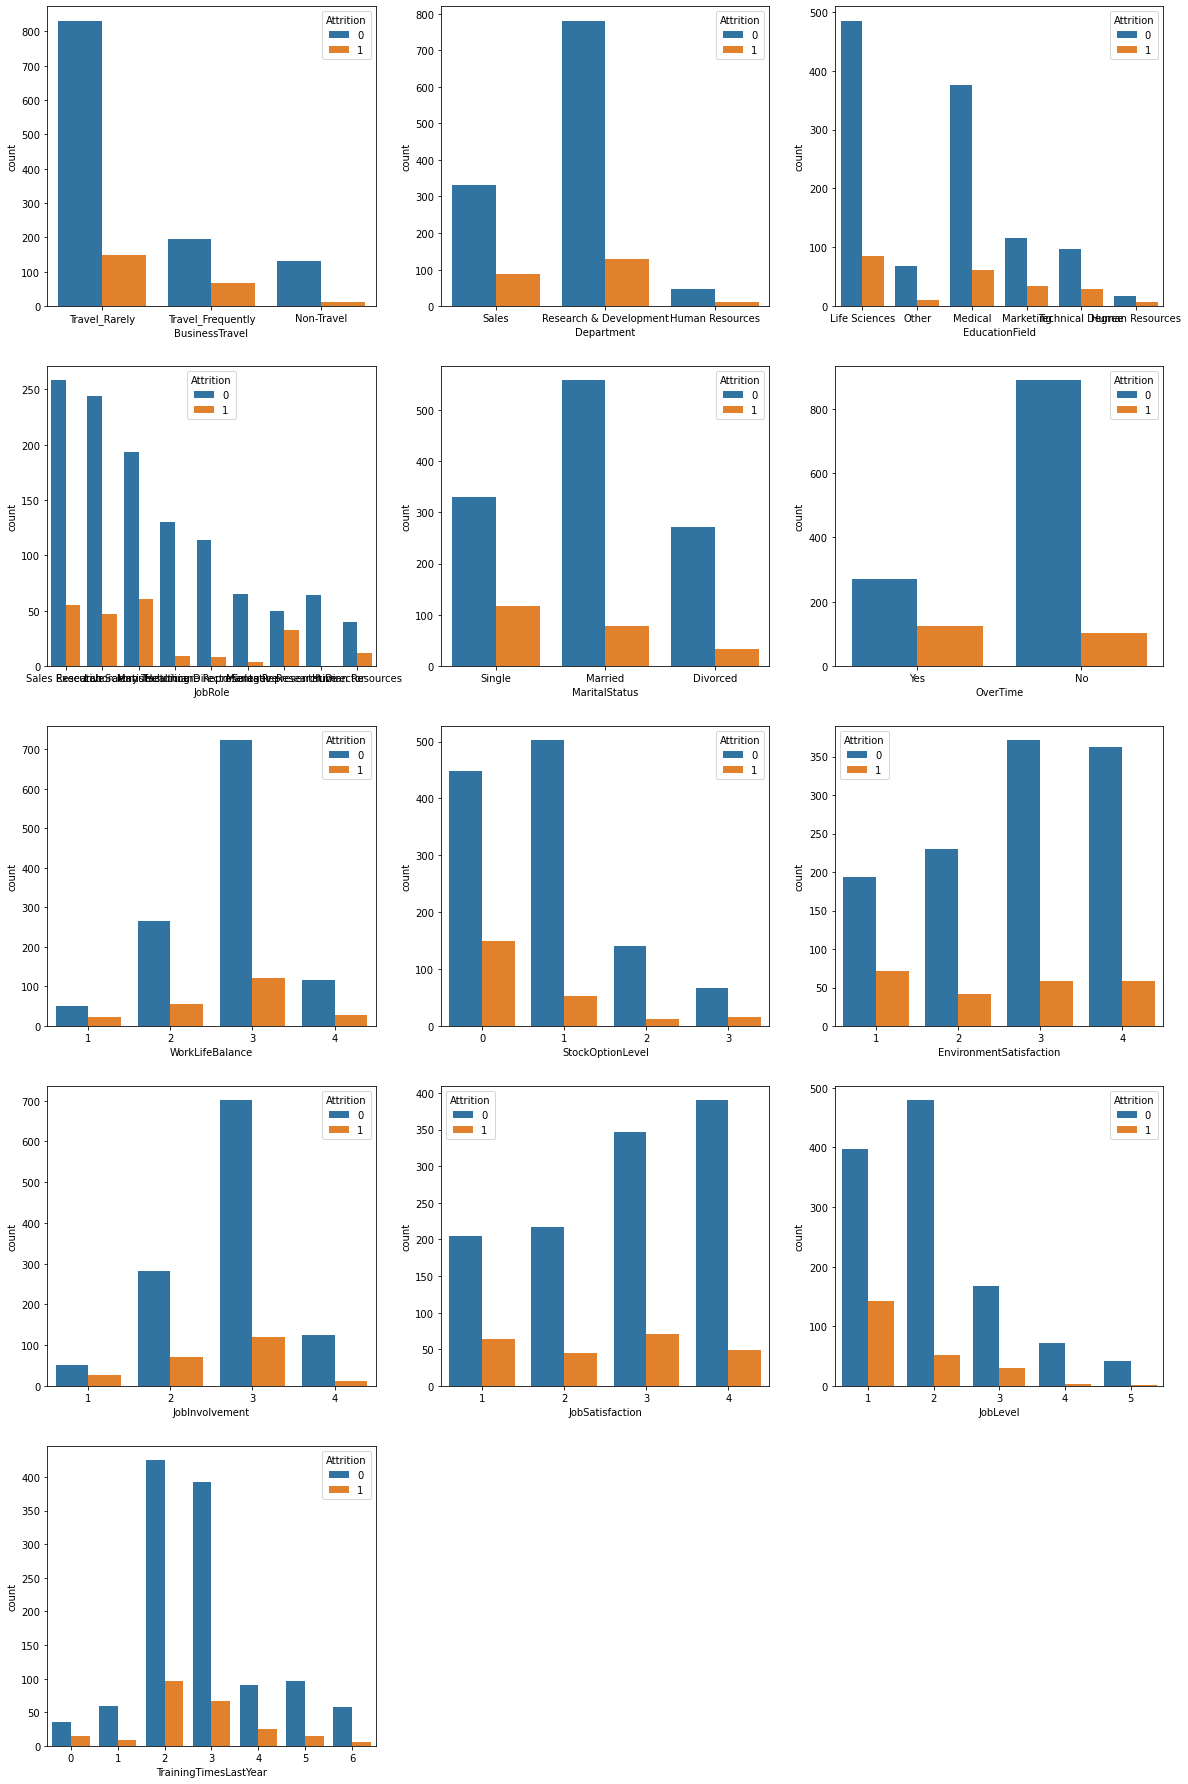

In [38]:
plt.figure(figsize=(20,32))

x = 1
for i in df[imp_cat_cols].columns:
    plt.subplot(5,3,x)
    sns.countplot(df[i],hue=df.Attrition)
    x = x+1

# Define X and Y

In [39]:
Y = df[["Attrition"]]

# Preprocessing

1.minmax scaler for con cols

2.one hot encoder for cat cols

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm =MinMaxScaler()
X1 =pd.DataFrame(mm.fit_transform(df[imp_con_cols]),columns= imp_con_cols)
X2 = pd.get_dummies(df[imp_cat_cols])
Xnew = X1.join(X2)

In [42]:
Xnew

,Age,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,WorkLifeBalance,StockOptionLevel,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,JobLevel,TrainingTimesLastYear,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.716332,0.000000,0.263230,0.235294,0.24,0.266667,0.357143,1,0,2,3,4,2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0.738095,0.126791,0.250000,0.217651,0.294118,0.40,0.466667,0.500000,3,1,3,2,2,2,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.452381,0.910458,0.035714,0.057093,0.205882,0.00,0.000000,0.000000,3,0,4,2,3,1,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0.357143,0.924069,0.071429,0.100349,0.235294,0.32,0.466667,0.000000,3,0,4,3,3,1,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0.214286,0.350287,0.035714,0.129872,0.176471,0.08,0.133333,0.142857,3,1,1,3,2,1,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.428571,0.560172,0.785714,0.082497,0.500000,0.20,0.133333,0.214286,3,1,3,4,4,2,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1383,0.500000,0.366046,0.178571,0.474385,0.264706,0.28,0.466667,0.500000,3,1,4,2,1,3,5,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1384,0.214286,0.037966,0.107143,0.271100,0.176471,0.24,0.133333,0.214286,3,1,2,4,2,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1385,0.738095,0.659742,0.035714,0.231383,0.500000,0.36,0.400000,0.571429,2,0,4,2,2,2,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [43]:
Y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1382,0
1383,0
1384,0
1385,0


# Splitting Data in Training and Testing

In [44]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(Xnew , Y , test_size= 0.3 , random_state=21)

# # Model Building

# # Model Building

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
tr_acc,ts_acc,round(tr_acc-ts_acc,2)

(0.89, 0.88, 0.01)

# Model Object

In [46]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    return tr_acc,ts_acc,round(tr_acc-ts_acc,2)

# Different Algos for Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree

In [48]:
dtc = DecisionTreeClassifier()
modeller(dtc)

(1.0, 0.77, 0.23)

# Pruning

In [49]:
# Max Depth

for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21 , max_depth= i)
    print(i , modeller(dtc))

2 (0.86, 0.81, 0.05)
3 (0.86, 0.83, 0.03)
4 (0.88, 0.83, 0.05)
5 (0.9, 0.81, 0.09)
6 (0.92, 0.82, 0.1)
7 (0.93, 0.81, 0.12)
8 (0.95, 0.8, 0.15)
9 (0.96, 0.78, 0.18)
10 (0.98, 0.78, 0.2)
11 (0.99, 0.77, 0.22)
12 (0.99, 0.78, 0.21)
13 (0.99, 0.77, 0.22)
14 (1.0, 0.76, 0.24)
15 (1.0, 0.77, 0.23)
16 (1.0, 0.77, 0.23)
17 (1.0, 0.77, 0.23)
18 (1.0, 0.77, 0.23)
19 (1.0, 0.77, 0.23)


In [50]:
# min samples leaf

for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21 , min_samples_leaf= i)
    print(i , modeller(dtc))

2 (0.98, 0.79, 0.19)
3 (0.95, 0.79, 0.16)
4 (0.93, 0.79, 0.14)
5 (0.92, 0.79, 0.13)
6 (0.91, 0.81, 0.1)
7 (0.9, 0.82, 0.08)
8 (0.89, 0.8, 0.09)
9 (0.89, 0.81, 0.08)
10 (0.88, 0.82, 0.06)
11 (0.88, 0.83, 0.05)
12 (0.88, 0.83, 0.05)
13 (0.88, 0.83, 0.05)
14 (0.88, 0.83, 0.05)
15 (0.88, 0.83, 0.05)
16 (0.88, 0.83, 0.05)
17 (0.87, 0.83, 0.04)
18 (0.88, 0.84, 0.04)
19 (0.88, 0.82, 0.06)


# Random Forest

In [51]:
for i in range(2,20):
    rfr = RandomForestClassifier(n_estimators= i,random_state=21)
    print(i , modeller(rfr))   

2 (0.93, 0.83, 0.1)
3 (0.96, 0.81, 0.15)
4 (0.95, 0.82, 0.13)
5 (0.97, 0.81, 0.16)
6 (0.96, 0.82, 0.14)
7 (0.98, 0.81, 0.17)
8 (0.97, 0.82, 0.15)
9 (0.98, 0.82, 0.16)
10 (0.98, 0.83, 0.15)
11 (0.98, 0.82, 0.16)
12 (0.98, 0.83, 0.15)
13 (0.99, 0.84, 0.15)
14 (0.99, 0.83, 0.16)
15 (0.99, 0.83, 0.16)
16 (0.99, 0.84, 0.15)
17 (0.99, 0.84, 0.15)
18 (0.99, 0.84, 0.15)
19 (0.99, 0.84, 0.15)


# Adaboost

In [52]:
for i in range(2,20):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=i)
    print(i , modeller(abc))  

2 (0.87, 0.83, 0.04)
3 (0.87, 0.83, 0.04)
4 (0.87, 0.85, 0.02)
5 (0.88, 0.84, 0.04)
6 (0.88, 0.85, 0.03)
7 (0.88, 0.85, 0.03)
8 (0.89, 0.84, 0.05)
9 (0.89, 0.84, 0.05)
10 (0.89, 0.85, 0.04)
11 (0.89, 0.84, 0.05)
12 (0.9, 0.84, 0.06)
13 (0.9, 0.85, 0.05)
14 (0.91, 0.85, 0.06)
15 (0.91, 0.85, 0.06)
16 (0.91, 0.85, 0.06)
17 (0.91, 0.84, 0.07)
18 (0.91, 0.85, 0.06)
19 (0.92, 0.85, 0.07)


# KNN

In [53]:
for i in range(2,20):
    knc = KNeighborsClassifier(n_neighbors=i)
    print(i,modeller(knc))

2 (0.89, 0.83, 0.06)
3 (0.9, 0.82, 0.08)
4 (0.86, 0.83, 0.03)
5 (0.87, 0.82, 0.05)
6 (0.86, 0.83, 0.03)
7 (0.86, 0.83, 0.03)
8 (0.85, 0.83, 0.02)
9 (0.86, 0.84, 0.02)
10 (0.85, 0.84, 0.01)
11 (0.85, 0.83, 0.02)
12 (0.85, 0.83, 0.02)
13 (0.85, 0.83, 0.02)
14 (0.84, 0.83, 0.01)
15 (0.85, 0.83, 0.02)
16 (0.85, 0.83, 0.02)
17 (0.85, 0.84, 0.01)
18 (0.84, 0.84, 0.0)
19 (0.84, 0.84, 0.0)


# Final Model

In [55]:
modeller(lr)

(0.89, 0.88, 0.01)

In [56]:
model = lr.fit(Xnew , Y)
W =df[["EmployeeNumber"]]
W["prediction"] = model.predict(Xnew)

In [57]:
W

,EmployeeNumber,prediction
0,1,1
1,2,0
2,4,0
3,5,0
4,7,0
...,...,...
1382,2061,0
1383,2062,0
1384,2064,0
1385,2065,0
